In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv('Data UMKM.csv', delimiter=';')
data

,Nama sentra,Kode sentra,Alamat,Kecamatan,Kelurahan,Luas sentra,Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,SWK Kendung,NaN,Jl. raya Kendung,BENOWO,SEMEMI,NaN,9,7,0.777778,5,0.714286
1,SWK Ketabang,NaN,Jl. Inspeksi Ketabang Kali,GENTENG,EMBONG KALIASIN,"569,30 m2",38,38,1.000000,38,1.000000
2,SWK Babat Jerawat,NaN,Jl. Raya Babat Jerawat,PAKAL,BABAT JERAWAT,1412 m2,28,27,0.964286,27,1.000000
3,SWK Balas Klumprik,NaN,Jl. Balas Klumprik,WIYUNG,BALAS KLUMPRIK,560 m2,15,11,0.733333,6,0.545455
4,SWK Bentul,NaN,Jl. Bentul,WONOKROMO,JAGIR,"227,5 m2",20,20,1.000000,14,0.700000
5,SWK Bratang Binangun,NaN,Jl. Raya Manyar No. 80A,GUBENG,BARATAJAYA,2000 m2,52,46,0.884615,41,0.891304
6,SWK Convention Hall,NaN,"Jl. Arief Rahman Hakim No.131-133, Keputih, Ke...",SUKOLILO,GEBANG PUTIH,960 m2,40,37,0.925000,20,0.540541
7,SWK Deles Merr,NaN,Arif Rahman Hakim No.14 Kelurahan Klampis Ngasem,SUKOLILO,KLAMPIS NGASEM,890 m2,36,31,0.861111,25,0.806452
8,SWK Dharmahusada,NaN,"Pojok Timur, Jl. Dharmahusada, Mulyorejo, Kec....",GUBENG,MOJO,350 m2,21,34,1.619048,32,0.941176
9,SWK Dharmawangsa,NaN,Jl. Raya Dharmawangsa,GUBENG,AIRLANGGA,500 m2,26,25,0.961538,25,1.000000


In [75]:
all_data = data.drop(data.columns[0:6], axis=1)
all_data.head()

,Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,9,7,0.777778,5,0.714286
1,38,38,1.000000,38,1.000000
2,28,27,0.964286,27,1.000000
3,15,11,0.733333,6,0.545455
4,20,20,1.000000,14,0.700000


In [15]:
from sklearn.preprocessing import normalize
data_scaled = normalize(all_data)
data_scaled = pd.DataFrame(data_scaled, columns=all_data.columns)
data_scaled.head()

C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,0.720311,0.560242,0.062249,0.400173,0.057168
1,0.577217,0.577217,0.015190,0.577217,0.015190
2,0.591090,0.569979,0.020356,0.569979,0.021110
3,0.766629,0.562195,0.037480,0.306652,0.027877
4,0.633251,0.633251,0.031663,0.443276,0.022164


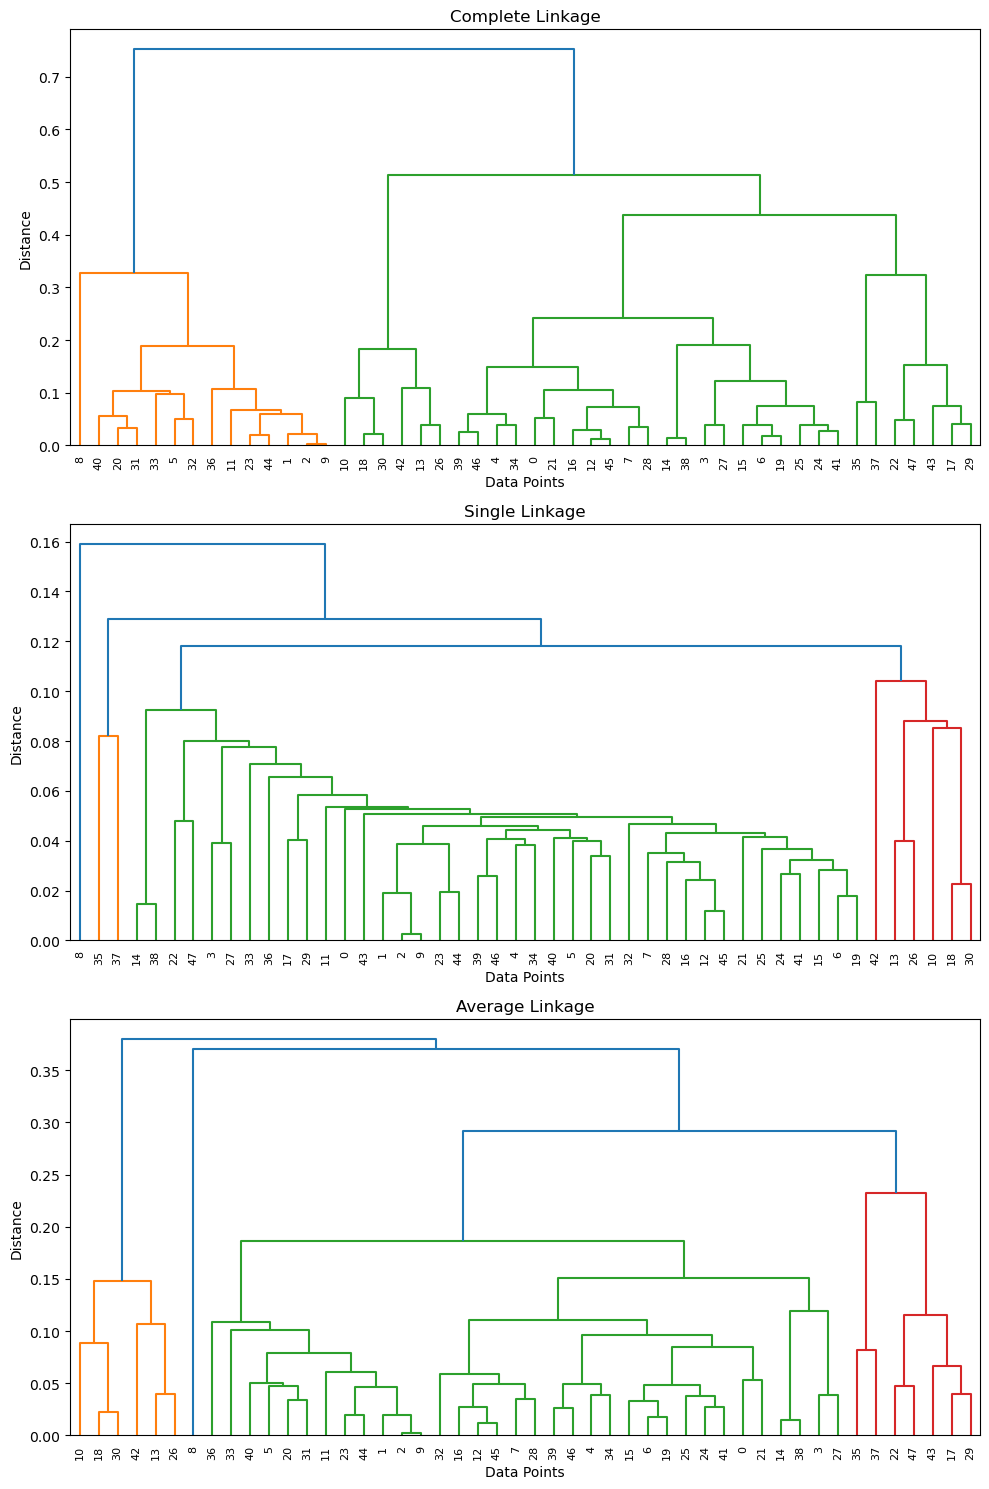

In [43]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

complete_clustering = linkage(data_scaled, method="complete", metric="euclidean")
average_clustering = linkage(data_scaled, method="average", metric="euclidean")
single_clustering = linkage(data_scaled, method="single", metric="euclidean")

dendrogram(complete_clustering, ax=axs[0])
axs[0].set_title('Complete Linkage')
axs[0].set_xlabel('Data Points')
axs[0].set_ylabel('Distance')

dendrogram(single_clustering, ax=axs[1])
axs[1].set_title('Single Linkage')
axs[1].set_xlabel('Data Points')
axs[1].set_ylabel('Distance')

dendrogram(average_clustering, ax=axs[2])
axs[2].set_title('Average Linkage')
axs[2].set_xlabel('Data Points')
axs[2].set_ylabel('Distance')

plt.tight_layout()
plt.show()

In [72]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

single_clustering = linkage(data_scaled, method="single", metric="euclidean")
coph_single, coph_dists_single = cophenet(single_clustering, pdist(data_scaled))

complete_clustering = linkage(data_scaled, method="complete", metric="euclidean")
coph_complete, coph_dists_complete = cophenet(complete_clustering, pdist(data_scaled))

average_clustering = linkage(data_scaled, method="average", metric="euclidean")
coph_average, coph_dists_average = cophenet(average_clustering, pdist(data_scaled))

print(F'Korelasi Cophenetic (Single Linkage): {coph_single:.4f}')
print(F'Korelasi Cophenetic (Complete Linkage): {coph_complete:.4f}')
print(F'Korelasi Cophenetic (Average Linkage): {coph_average:.4f}')

Korelasi Cophenetic (Single Linkage): 0.7423
Korelasi Cophenetic (Complete Linkage): 0.5549
Korelasi Cophenetic (Average Linkage): 0.7954


C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

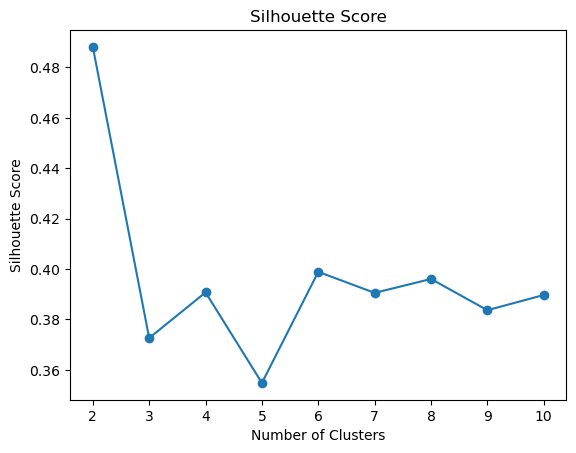

In [62]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_cluster in range(2, 11):
    clusterer = AgglomerativeClustering(n_clusters=n_cluster, linkage='average')
    cluster_labels = clusterer.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Elbow Method
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [81]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(data_scaled)
labels = agglo.labels_
hasil_agglo = pd.concat([data_scaled, pd.DataFrame({'cluster':labels})], axis=1)
hasil_agglo

C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah,cluster
0,0.720311,0.560242,0.062249,0.400173,0.057168,0
1,0.577217,0.577217,0.015190,0.577217,0.015190,1
2,0.591090,0.569979,0.020356,0.569979,0.021110,1
3,0.766629,0.562195,0.037480,0.306652,0.027877,0
4,0.633251,0.633251,0.031663,0.443276,0.022164,0
5,0.644853,0.570447,0.010970,0.508442,0.011053,1
6,0.689026,0.637349,0.015934,0.344513,0.009311,0
7,0.670426,0.577311,0.016036,0.465573,0.015018,0
8,0.409917,0.663674,0.031604,0.624635,0.018372,1
9,0.592145,0.569371,0.021899,0.569371,0.022775,1


#

#

In [74]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_data)

norm_all = pd.DataFrame(scaled_data, columns = all_data.columns)
norm_all

C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

,Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,-1.128038,-1.090876,-0.250202,-0.898956,0.060538
1,0.423571,0.860114,0.730556,1.462481,1.330312
2,-0.111466,0.167827,0.572934,0.675335,1.330312
3,-0.807015,-0.839135,-0.446354,-0.827398,-0.689782
4,-0.539496,-0.272719,0.730556,-0.254928,-0.002950
5,1.172624,1.363595,0.221316,1.677157,0.847246
6,0.530579,0.797178,0.399550,0.174424,-0.711621
7,0.316564,0.419568,0.117582,0.532218,0.470143
8,-0.485992,0.608373,3.462670,1.033129,1.068888
9,-0.218474,0.041957,0.560810,0.532218,1.330312


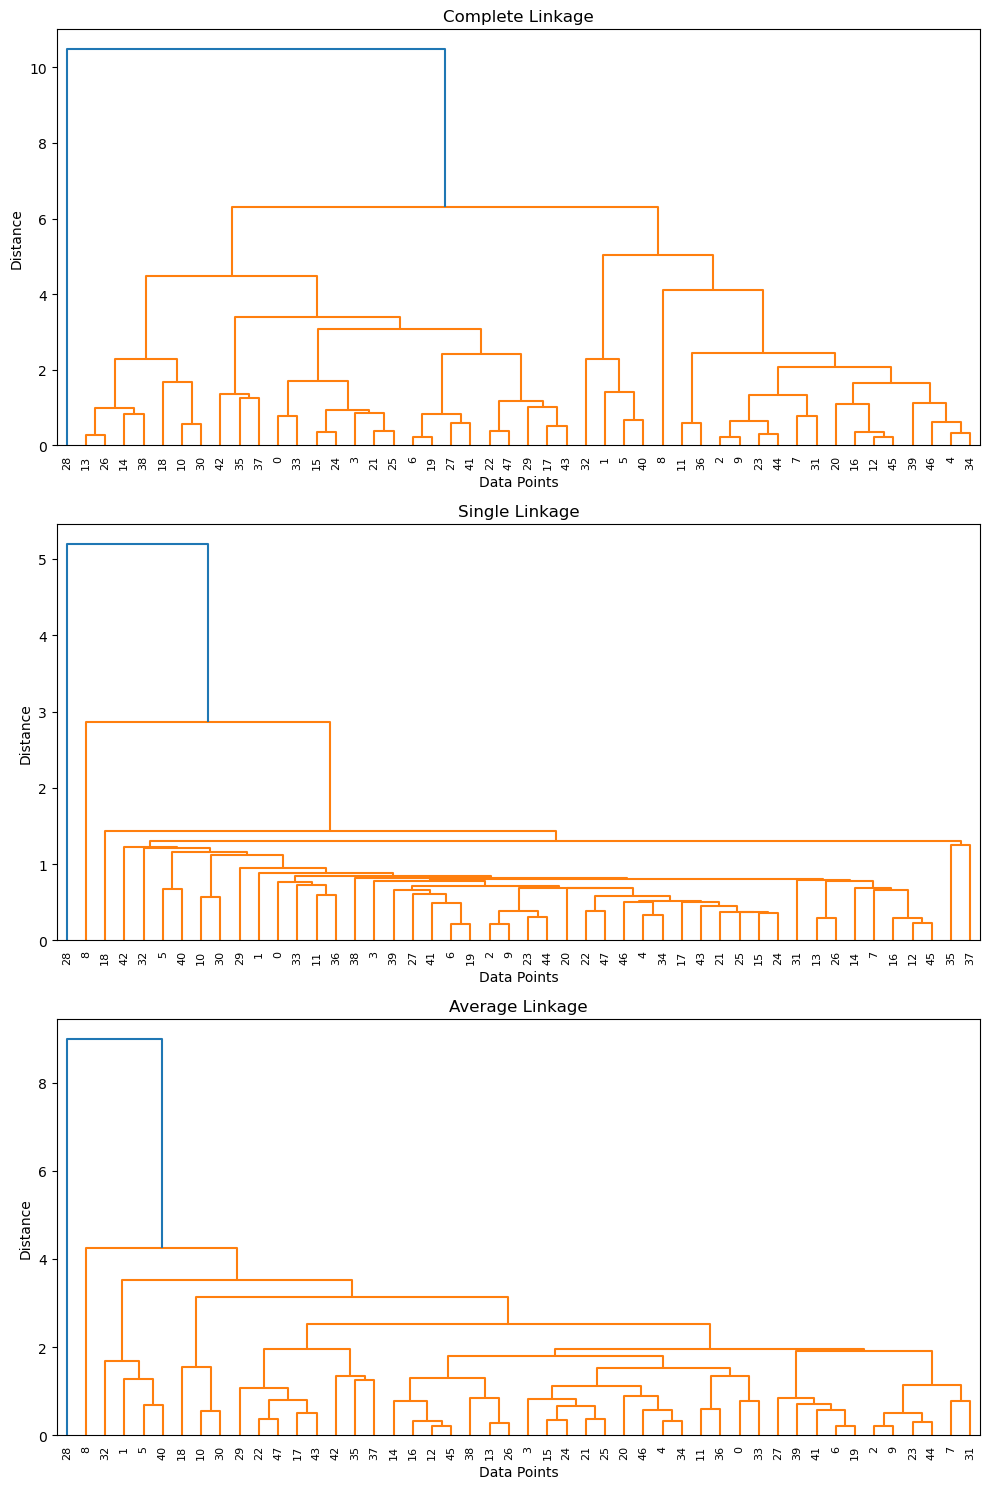

In [46]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

complete_clustering = linkage(norm_all, method="complete", metric="euclidean")
average_clustering = linkage(norm_all, method="average", metric="euclidean")
single_clustering = linkage(norm_all, method="single", metric="euclidean")

dendrogram(complete_clustering, ax=axs[0])
axs[0].set_title('Complete Linkage')
axs[0].set_xlabel('Data Points')
axs[0].set_ylabel('Distance')

dendrogram(single_clustering, ax=axs[1])
axs[1].set_title('Single Linkage')
axs[1].set_xlabel('Data Points')
axs[1].set_ylabel('Distance')

dendrogram(average_clustering, ax=axs[2])
axs[2].set_title('Average Linkage')
axs[2].set_xlabel('Data Points')
axs[2].set_ylabel('Distance')

plt.tight_layout()
plt.show()

In [71]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

# Metode Single Linkage
single_clustering = linkage(norm_all, method="single", metric="euclidean")
coph_single, coph_dists_single = cophenet(single_clustering, pdist(norm_all))

# Metode Complete Linkage
complete_clustering = linkage(norm_all, method="complete", metric="euclidean")
coph_complete, coph_dists_complete = cophenet(complete_clustering, pdist(norm_all))

# Metode Average Linkage
average_clustering = linkage(norm_all, method="average", metric="euclidean")
coph_average, coph_dists_average = cophenet(average_clustering, pdist(norm_all))

print(F'Korelasi Cophenetic (Single Linkage): {coph_single:.4f}')
print(F'Korelasi Cophenetic (Complete Linkage): {coph_complete:.4f}')
print(F'Korelasi Cophenetic (Average Linkage): {coph_average:.4f}')

Korelasi Cophenetic (Single Linkage): 0.8532
Korelasi Cophenetic (Complete Linkage): 0.6768
Korelasi Cophenetic (Average Linkage): 0.9065


C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

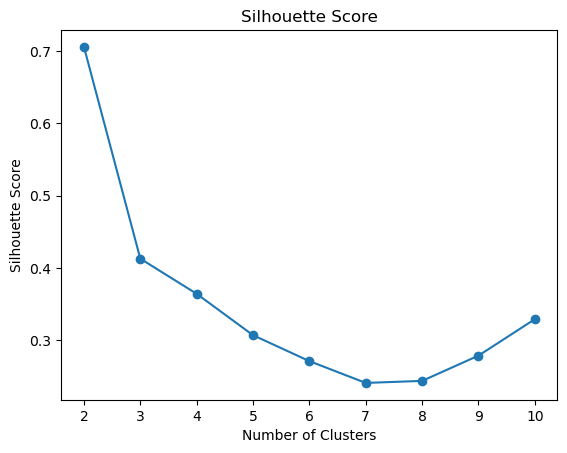

In [64]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_cluster in range(2, 11):
    clusterer = AgglomerativeClustering(n_clusters=n_cluster, linkage='average')
    cluster_labels = clusterer.fit_predict(norm_all)
    silhouette_avg = silhouette_score(norm_all, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Elbow Method
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [80]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(norm_all)
labels = agglo.labels_
hasil_agglo = pd.concat([norm_all, pd.DataFrame({'cluster':labels})], axis=1)
hasil_agglo

C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah,cluster
0,-1.128038,-1.090876,-0.250202,-0.898956,0.060538,0
1,0.423571,0.860114,0.730556,1.462481,1.330312,0
2,-0.111466,0.167827,0.572934,0.675335,1.330312,0
3,-0.807015,-0.839135,-0.446354,-0.827398,-0.689782,0
4,-0.539496,-0.272719,0.730556,-0.254928,-0.002950,0
5,1.172624,1.363595,0.221316,1.677157,0.847246,0
6,0.530579,0.797178,0.399550,0.174424,-0.711621,0
7,0.316564,0.419568,0.117582,0.532218,0.470143,0
8,-0.485992,0.608373,3.462670,1.033129,1.068888,0
9,-0.218474,0.041957,0.560810,0.532218,1.330312,0


#

# PER-KECAMATAN

In [4]:
sum_by_kecamatan = data.groupby('Kecamatan').agg({
    'Kapasitas': 'sum',
    'Jumlah pelaku usaha': 'sum',
    'Okupansi sentra (%)': 'sum',
    'Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah': 'sum',
    'Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah': 'sum'
}).reset_index()

sum_by_kecamatan

,Kecamatan,Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,BENOWO,45,42,2.725146,23,1.733894
1,GAYUNGAN,63,36,1.136089,31,1.800000
2,GENTENG,125,114,4.714719,97,4.335178
3,GUBENG,167,159,4.259319,147,3.739888
4,GUNUNG ANYAR,32,16,0.500000,11,0.687500
5,JAMBANGAN,67,57,1.679673,37,1.344156
6,KENJERAN,28,14,0.500000,6,0.428571
7,KREMBANGAN,78,62,2.484314,53,2.558555
8,LAKARSANTRI,35,30,1.715686,19,1.266667
9,MULYOREJO,40,31,0.775000,16,0.516129


In [6]:
#tiap kecamatan
drop_data_kec = sum_by_kecamatan.drop(sum_by_kecamatan.columns[0], axis=1)
drop_data_kec

,Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,45,42,2.725146,23,1.733894
1,63,36,1.136089,31,1.800000
2,125,114,4.714719,97,4.335178
3,167,159,4.259319,147,3.739888
4,32,16,0.500000,11,0.687500
5,67,57,1.679673,37,1.344156
6,28,14,0.500000,6,0.428571
7,78,62,2.484314,53,2.558555
8,35,30,1.715686,19,1.266667
9,40,31,0.775000,16,0.516129


In [50]:
from sklearn.preprocessing import normalize
data_scaled2 = normalize(drop_data_kec)
data_scaled2 = pd.DataFrame(data_scaled2, columns=drop_data_kec.columns)
data_scaled2.head()

C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,0.683986,0.638387,0.041421,0.349593,0.026355
1,0.798138,0.456079,0.014393,0.392735,0.022804
2,0.640638,0.584262,0.024163,0.497135,0.022218
3,0.610567,0.581318,0.015572,0.537445,0.013673
4,0.854710,0.427355,0.013355,0.293807,0.018363


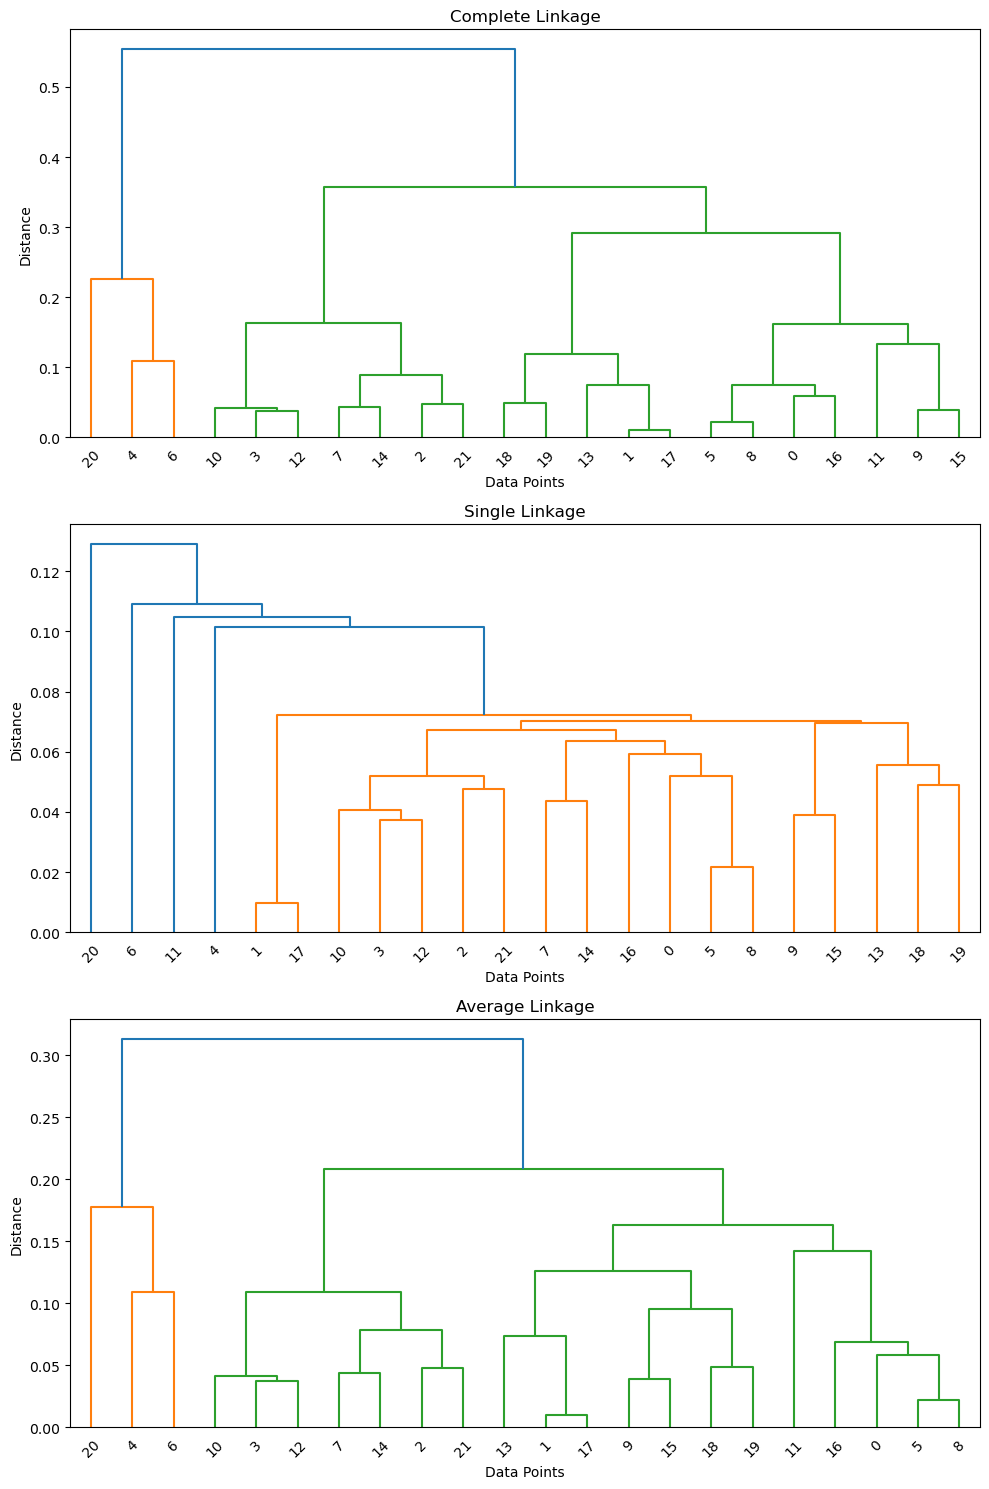

In [51]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

complete_clustering = linkage(data_scaled2, method="complete", metric="euclidean")
average_clustering = linkage(data_scaled2, method="average", metric="euclidean")
single_clustering = linkage(data_scaled2, method="single", metric="euclidean")

dendrogram(complete_clustering, ax=axs[0])
axs[0].set_title('Complete Linkage')
axs[0].set_xlabel('Data Points')
axs[0].set_ylabel('Distance')

dendrogram(single_clustering, ax=axs[1])
axs[1].set_title('Single Linkage')
axs[1].set_xlabel('Data Points')
axs[1].set_ylabel('Distance')

dendrogram(average_clustering, ax=axs[2])
axs[2].set_title('Average Linkage')
axs[2].set_xlabel('Data Points')
axs[2].set_ylabel('Distance')

plt.tight_layout()
plt.show()

In [70]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

# Metode Single Linkage
single_clustering = linkage(data_scaled2, method="single", metric="euclidean")
coph_single, coph_dists_single = cophenet(single_clustering, pdist(data_scaled2))

# Metode Complete Linkage
complete_clustering = linkage(data_scaled2, method="complete", metric="euclidean")
coph_complete, coph_dists_complete = cophenet(complete_clustering, pdist(data_scaled2))

# Metode Average Linkage
average_clustering = linkage(data_scaled2, method="average", metric="euclidean")
coph_average, coph_dists_average = cophenet(average_clustering, pdist(data_scaled2))

print(F'Korelasi Cophenetic (Single Linkage): {coph_single:.4f}')
print(F'Korelasi Cophenetic (Complete Linkage): {coph_complete:.4f}')
print(F'Korelasi Cophenetic (Average Linkage): {coph_average:.4f}')

Korelasi Cophenetic (Single Linkage): 0.6822
Korelasi Cophenetic (Complete Linkage): 0.7434
Korelasi Cophenetic (Average Linkage): 0.7395


C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

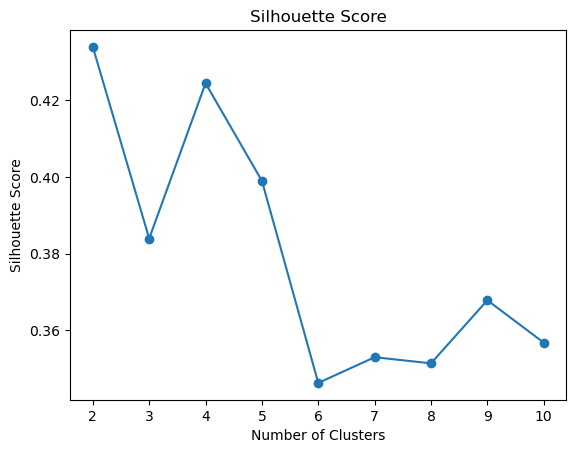

In [66]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_cluster in range(2, 11):
    clusterer = AgglomerativeClustering(n_clusters=n_cluster, linkage='complete')
    cluster_labels = clusterer.fit_predict(data_scaled2)
    silhouette_avg = silhouette_score(data_scaled2, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Elbow Method
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [79]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(data_scaled2)
labels = agglo.labels_
hasil_agglo = pd.concat([data_scaled2, pd.DataFrame({'cluster':labels})], axis=1)
hasil_agglo

C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah,cluster
0,0.683986,0.638387,0.041421,0.349593,0.026355,0
1,0.798138,0.456079,0.014393,0.392735,0.022804,0
2,0.640638,0.584262,0.024163,0.497135,0.022218,1
3,0.610567,0.581318,0.015572,0.537445,0.013673,1
4,0.854710,0.427355,0.013355,0.293807,0.018363,0
5,0.701903,0.597141,0.017597,0.387618,0.014082,0
6,0.878251,0.439125,0.015683,0.188197,0.013443,0
7,0.690787,0.549087,0.022002,0.469381,0.022659,1
8,0.701327,0.601137,0.034379,0.380720,0.025381,0
9,0.753529,0.583985,0.014600,0.301411,0.009723,0


#

#

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(drop_data_kec)

norm_all2 = pd.DataFrame(scaled_data, columns = all_data.columns)
norm_all

C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

,Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,-0.515930,-0.297862,0.762375,-0.463928,0.204030
1,-0.065912,-0.459001,-0.577013,-0.221639,0.269769
2,1.484152,1.635801,2.439350,1.777244,2.790833
3,2.534196,2.844341,2.055502,3.291550,2.198857
4,-0.840944,-0.996130,-1.113161,-0.827362,-0.836538
5,0.034092,0.104984,-0.118835,-0.039923,-0.183538
6,-0.940948,-1.049843,-1.113161,-0.978792,-1.094025
7,0.309104,0.239266,0.559382,0.444655,1.024101
8,-0.765941,-0.620140,-0.088480,-0.585073,-0.260596
9,-0.640936,-0.593283,-0.881368,-0.675931,-1.006955


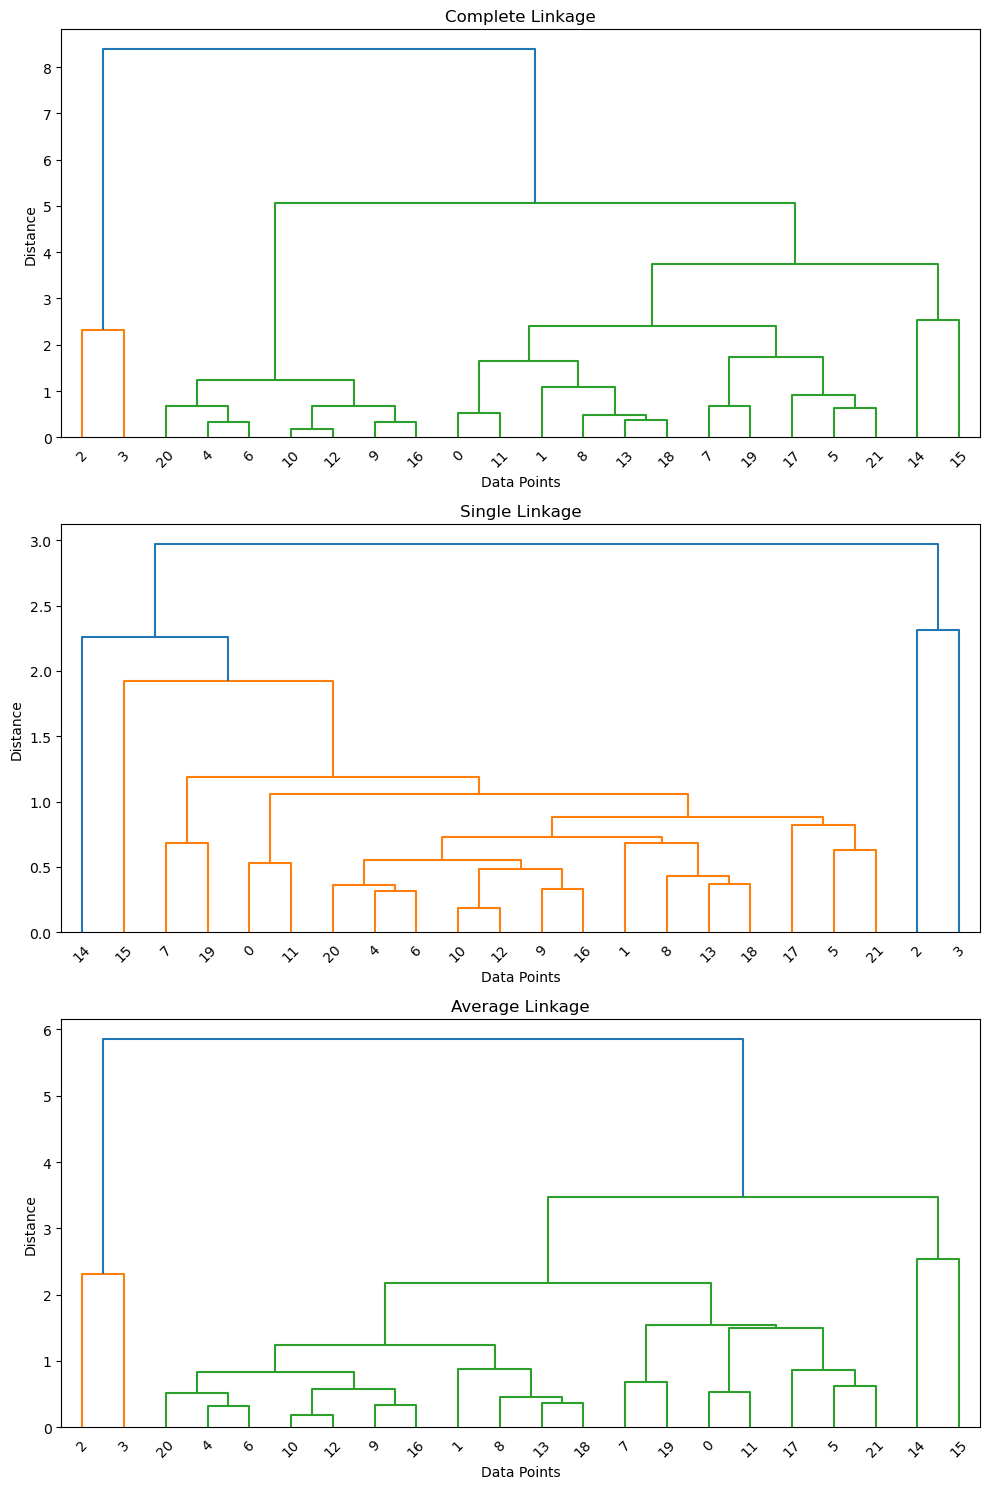

In [56]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

complete_clustering = linkage(norm_all2, method="complete", metric="euclidean")
average_clustering = linkage(norm_all2, method="average", metric="euclidean")
single_clustering = linkage(norm_all2, method="single", metric="euclidean")

dendrogram(complete_clustering, ax=axs[0])
axs[0].set_title('Complete Linkage')
axs[0].set_xlabel('Data Points')
axs[0].set_ylabel('Distance')

dendrogram(single_clustering, ax=axs[1])
axs[1].set_title('Single Linkage')
axs[1].set_xlabel('Data Points')
axs[1].set_ylabel('Distance')

dendrogram(average_clustering, ax=axs[2])
axs[2].set_title('Average Linkage')
axs[2].set_xlabel('Data Points')
axs[2].set_ylabel('Distance')

plt.tight_layout()
plt.show()

In [73]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

# Metode Single Linkage
single_clustering = linkage(norm_all2, method="single", metric="euclidean")
coph_single, coph_dists_single = cophenet(single_clustering, pdist(norm_all2))

# Metode Complete Linkage
complete_clustering = linkage(norm_all2, method="complete", metric="euclidean")
coph_complete, coph_dists_complete = cophenet(complete_clustering, pdist(norm_all2))

# Metode Average Linkage
average_clustering = linkage(norm_all2, method="average", metric="euclidean")
coph_average, coph_dists_average = cophenet(average_clustering, pdist(norm_all2))

print(F'Korelasi Cophenetic (Single Linkage): {coph_single:.4f}')
print(F'Korelasi Cophenetic (Complete Linkage): {coph_complete:.4f}')
print(F'Korelasi Cophenetic (Average Linkage): {coph_average:.4f}')

Korelasi Cophenetic (Single Linkage): 0.8895
Korelasi Cophenetic (Complete Linkage): 0.8052
Korelasi Cophenetic (Average Linkage): 0.9085


C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

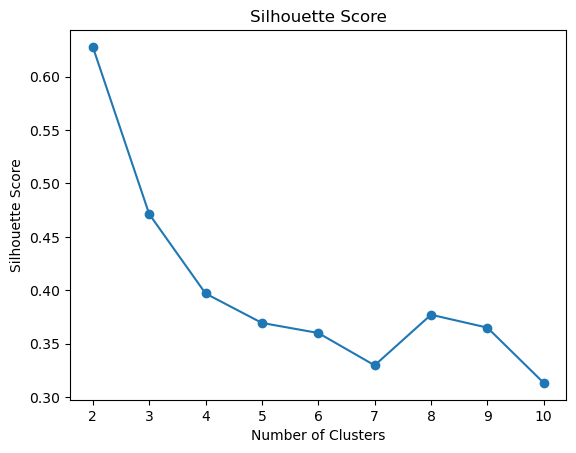

In [67]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_cluster in range(2, 11):
    clusterer = AgglomerativeClustering(n_clusters=n_cluster, linkage='average')
    cluster_labels = clusterer.fit_predict(norm_all2)
    silhouette_avg = silhouette_score(norm_all2, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Elbow Method
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [78]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(norm_all2)
labels = agglo.labels_
hasil_agglo = pd.concat([norm_all2, pd.DataFrame({'cluster':labels})], axis=1)
hasil_agglo

C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah,cluster
0,-0.515930,-0.297862,0.762375,-0.463928,0.204030,0
1,-0.065912,-0.459001,-0.577013,-0.221639,0.269769,0
2,1.484152,1.635801,2.439350,1.777244,2.790833,1
3,2.534196,2.844341,2.055502,3.291550,2.198857,1
4,-0.840944,-0.996130,-1.113161,-0.827362,-0.836538,0
5,0.034092,0.104984,-0.118835,-0.039923,-0.183538,0
6,-0.940948,-1.049843,-1.113161,-0.978792,-1.094025,0
7,0.309104,0.239266,0.559382,0.444655,1.024101,0
8,-0.765941,-0.620140,-0.088480,-0.585073,-0.260596,0
9,-0.640936,-0.593283,-0.881368,-0.675931,-1.006955,0
